Генерация рядов точек (x, y)

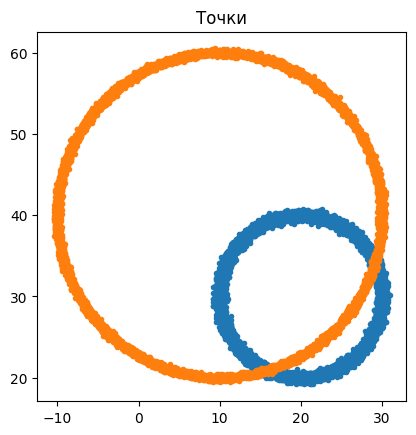

In [119]:
import matplotlib.pyplot as plt
import numpy as np

def generate_circle_points(radius, xc, yc, num_points, noise):
    
    theta = np.linspace(0, 2*np.pi, num_points)

    x = xc + radius * np.cos(theta)
    y = yc + radius * np.sin(theta)
    
    x_noisy = x + np.random.normal(0, noise, num_points)
    y_noisy = y + np.random.normal(0, noise, num_points)
    return x_noisy, y_noisy

N = 10000

def draw_circle_points(x,y):
    plt.plot(x, y, '.')
    plt.gca().set_aspect('equal', adjustable='box')
    plt.title('Точки')
    
x1, y1 = generate_circle_points(10, 20, 30, N, 0.3)
draw_circle_points(x1, y1)

x2, y2 = generate_circle_points(20, 10, 40, N, 0.2)
draw_circle_points(x2, y2)
plt.show()

Разметка

In [120]:
r1, r2 = np.ones(N), 2*np.ones(N) 

Объединение двух рядов

In [121]:
c1 = np.column_stack((x1, y1, r1))
c2 = np.column_stack((x2, y2, r2))

In [122]:
combined = np.concatenate((c1, c2), axis=0)
combined

array([[30.1100889 , 29.66511837,  1.        ],
       [30.27962763, 30.07788866,  1.        ],
       [29.88128405, 30.77391475,  1.        ],
       ...,
       [29.72107708, 40.04462702,  2.        ],
       [30.01255729, 40.18119244,  2.        ],
       [29.79037781, 40.01313755,  2.        ]])

Перемешивание данных

In [123]:
permuted_columns = np.random.permutation(len(combined))
permuted_columns

array([12434,  2044, 16224, ..., 15540, 17012, 12419])

In [124]:

#print(c1)


combined_permuted = combined[permuted_columns, :]
combined_permuted
# data = np.vstack((class1, class2))
# data

array([[11.09755973, 60.13975602,  2.        ],
       [22.79717603, 40.0127693 ,  1.        ],
       [-4.26628136, 25.97786212,  2.        ],
       ...,
       [-8.97072621, 33.28875297,  2.        ],
       [ 3.9463679 , 20.85071931,  2.        ],
       [11.29140986, 59.99066154,  2.        ]])

Проверка перемешивания

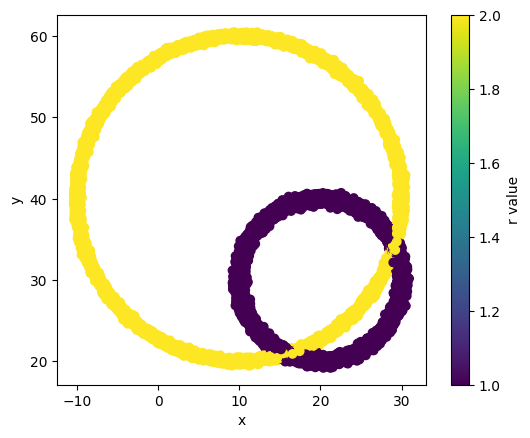

In [125]:
plt.scatter(combined_permuted[:, 0], combined_permuted[:, 1], c=combined_permuted[:, 2])
plt.colorbar(label='r value')
plt.xlabel('x')
plt.ylabel('y')
plt.gca().set_aspect('equal', adjustable='box')
plt.show()


Разбиение на подвыборки

In [126]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(combined_permuted, test_size = 0.2)

In [127]:
len(train)

16000

In [128]:
X_train = train[:, :2]

In [129]:
X_train

array([[11.52157323, 25.53293594],
       [21.4353944 , 56.80798008],
       [24.77939722, 26.54831158],
       ...,
       [17.63513738, 39.71031864],
       [26.85163081, 22.95218607],
       [20.58898245, 57.22789805]])

In [130]:
y_train = train[:, 2]
y_train

array([1., 2., 2., ..., 1., 1., 2.])

Обучение классификатора

In [106]:
!pip install lightgbm


[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [131]:
import lightgbm as lgbm
from lightgbm import LGBMClassifier

# train_data = lgb.Dataset(train[:, :2], label=train[:, 2])
# test_data = lgb.Dataset(test[:, :2], label=test[:, 2], reference=train_data)



param_grid = {
    'class_weight': [None, 'balanced'],
    'num_leaves': list(range(30, 150)),
    'learning_rate': [0.01,0.1],
    'min_child_samples': [10,50,100],
    "max_depth": [10,50,100]
}

lgbm = LGBMClassifier() # Shortname the LGBMClassifier()

lgbm.fit(X_train, y_train) # Train the lgbm on train sets


[LightGBM] [Info] Number of positive: 7987, number of negative: 8013
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000154 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 510
[LightGBM] [Info] Number of data points in the train set: 16000, number of used features: 2
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499188 -> initscore=-0.003250
[LightGBM] [Info] Start training from score -0.003250


LGBMClassifier()

Рассчет метрик на тестовой выборке

In [132]:
X_test = test[:, :2]
ground_true = test[:, 2]
ground_true = ground_true.reshape(-1, 1)
ground_true

array([[1.],
       [2.],
       [2.],
       ...,
       [1.],
       [1.],
       [2.]])

In [141]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

prediction = lgbm.predict(X_test) #Predicting X_test to find the solutiın
score = accuracy_score(ground_true, prediction) # Find the accuracy of y_test and predicitons, and round the result
round(score, 2)

0.98

In [134]:
prediction

array([1., 2., 2., ..., 1., 1., 2.])

In [142]:
TP, FP, TN, FN = 0, 0, 0, 0
for p, g_th in zip(prediction, ground_true):
    if p == 1 and g_th == 1:
        TP += 1
    if p == 1 and g_th == 2:
        FP += 1
    if p == 2 and g_th == 1:
        TN += 1
    if p == 2 and g_th == 2:
        FN += 1

In [143]:
accuracy = (TP + TN) / (TP + FP + TN + FN)

In [144]:
accuracy

0.49675

In [145]:
score = precision_score(ground_true, prediction)
round(score, 2)

0.98

In [146]:
score = recall_score(ground_true, prediction)
round(score, 2)

0.99

In [147]:
score = f1_score(ground_true, prediction)
round(score, 2)

0.98